# 目的
iPhone7カメラの分光感度特性を求める。

# モデル化

\begin{equation*}
X_n = \int_{380}^{780} l(\lambda)\, r_n(\lambda)\, c_0(\lambda)\, \bar{x}(\lambda)\, d\lambda \\
Y_n = \int_{380}^{780} l(\lambda)\, r_n(\lambda)\, c_1(\lambda)\, \bar{y}(\lambda)\, d\lambda \\
Z_n = \int_{380}^{780} l(\lambda)\, r_n(\lambda)\, c_2(\lambda)\, \bar{z}(\lambda)\, d\lambda \\
\end{equation*}

ここで各種記号は以下の意味を持つ。

 * $l(\lambda)$ : 光源のスペクトル
 * $r_n(\lambda)$ : $n$ 番目のカラーパッチの分光反射率
 * $c_m(\lambda)$ : カメラの $m$ 番目のカラーチャネルの分光感度特性
 * $\bar{x}(\lambda), \bar{y}(\lambda), \bar{z}(\lambda)$ : CIE1931 の color matching function

今、私が求めたい値は $c_m(\lambda)$ である。その他の値は(一応)既知である。

# $c_m(\lambda)$ の算出
$c_m(\lambda)$ がどのような外形をしているかサッパリ分からないが、正規分布みたいな形をしていると想定して話を進める。

とりあえず以下のように数十パターンの予測関数を作る。で、その中で一番辻褄が合う関数を $c_m(\lambda)$ と決めることにする。

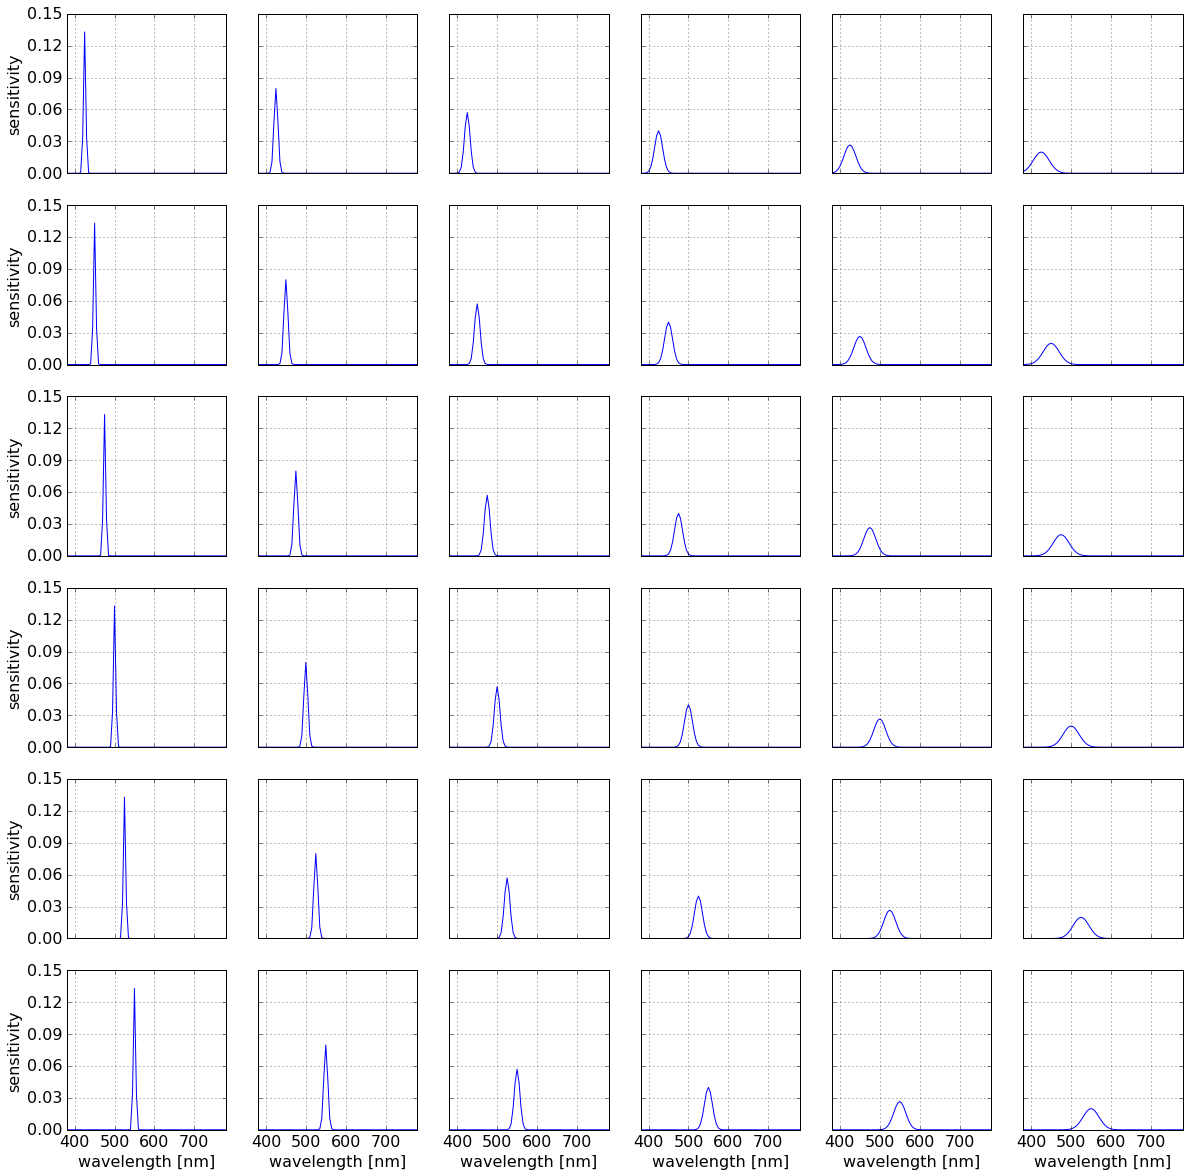

In [1]:
# Rチャネルの分光感度特性を近似した関数を生成
# -------------------------------------------------------
%matplotlib inline
import check_fundamental_data as cfd
import imp
imp.reload(cfd)
mu_list = [425, 450, 475, 500, 525, 550]
sigma_list = [3, 5, 7, 10, 15, 20]
cfd.plot_normal_distribution(mu_list, sigma_list)

# $X_n, Y_n, Z_n$ の算出

iPhone7 で color patch を RAW撮影したものを RGB to XYZ 変換して求める。RAW現像は Adobe Lightroom を使うが全ての補正機能をOFFすることに注意。

![raw_develop](./figure/raw_develop.png)

color patch は全部で24種類

In [4]:
%matplotlib inline
import check_fundamental_data as cfd
import get_iPhone7_spectral_sensitivity_characteristics as gissc
import imp
import numpy as np
imp.reload(cfd)
imp.reload(gissc)
rgb_val = np.uint16(np.round(cfd.get_color_patch_average()))
large_xyz = gissc.color_patch_rgb_to_large_xyz(rgb_val)
print(large_xyz)

[[[ 14.47077274  12.71044731   6.7427969 ]
  [ 57.48485947  54.1068573   44.53316879]
  [ 30.02576256  31.16786575  55.31442642]
  [ 17.83967972  22.94009209  10.58531857]
  [ 49.04056168  48.07053375  72.48623657]
  [ 61.97937775  72.41669464  78.32217407]
  [ 52.56476593  43.16841125  10.12787247]
  [ 17.7803936   13.79110241  57.79990387]
  [ 50.29788589  36.09810257  27.10502434]
  [ 12.45218563   8.22799397  21.95223808]
  [ 53.66438675  68.88379669  26.87505722]
  [ 64.00788116  63.72622299  19.00478554]
  [  8.74014473   4.84238863  40.51584244]
  [ 24.21697235  38.53873825  16.28282166]
  [ 34.59924316  21.24190331   8.28495312]
  [ 72.94236755  80.28009796  26.05172348]
  [ 53.57268906  39.65180588  54.07446671]
  [ 47.87680817  53.39416122  79.07579803]
  [ 83.68015289  87.88562775  94.28875732]
  [ 72.20466614  75.96755981  81.59327698]
  [ 56.73134232  59.71028137  64.10448456]
  [ 32.80121231  34.36131287  35.93809509]
  [ 13.70812035  14.36765003  15.23544598]
  [  3.1981